In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import logging

# Import the sleap_roots package
import sleap_roots as sr

from pathlib import Path

# Use the following notation to import individual functions from the sleap_roots package
from sleap_roots.points import get_all_pts_array, get_nodes
from sleap_roots.convhull import get_convhull, get_chull_area, get_chull_perimeter, get_chull_intersection_vectors
from sleap_roots.lengths import get_root_lengths, get_curve_index
from sleap_roots.bases import get_bases, get_base_tip_dist
from sleap_roots.tips import get_tips

In [2]:
# Set up logging
logging.basicConfig(level=logging.INFO)

The `OlderMonocotPipeline` was constructed for single, monocot plants in cylinders with 72 frame image series.  
The monocot is usually more than 6 days-old or when the primary root is not obvious.     
It expects h5 files, and crown root predictions per cylinder. 

In [3]:
# Print sleap_roots version
print(sr.__version__)

0.1.2


In [4]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current directory:", current_directory)

Current directory: c:\repos\sleap-roots\notebooks


In [5]:
# Use this cell if you want to change the current working directory

# Define the directory you want to change to
new_directory = "C:/repos/sleap-roots"

# Change the current working directory
os.chdir(new_directory)

# Get the updated current working directory
updated_directory = os.getcwd()

# Print the updated current working directory
print("Updated current directory:", updated_directory)


Updated current directory: C:\repos\sleap-roots


In [6]:
# Change these variables for your own data
folder_path = "tests/data/rice_10do_pipeline_output" # Location of images and predictions for older monocots
crown_name = "crown" # For loading crown root predictions

In [7]:
# Find slp files in the folder
slp_files = sr.find_all_slp_paths(folder_path)
slp_files

['tests/data/rice_10do_pipeline_output/scan0K9E8BI.model123.rootcrown.slp',
 'tests/data/rice_10do_pipeline_output/scan_7859150.model_221208_113552.multi_instance.n=574.root_crown.slp']

In [8]:
# Load the slp files
all_series = sr.load_series_from_slps(slp_files)
all_series


[Series(series_name='scan_7859150', h5_path=None, primary_path=None, lateral_path=None, crown_path='tests/data/rice_10do_pipeline_output/scan_7859150.model_221208_113552.multi_instance.n=574.root_crown.slp', primary_labels=None, lateral_labels=None, crown_labels=Labels(labeled_frames=72, videos=1, skeletons=1, tracks=0, suggestions=0), video=None, csv_path=None),
 Series(series_name='scan0K9E8BI', h5_path=None, primary_path=None, lateral_path=None, crown_path='tests/data/rice_10do_pipeline_output/scan0K9E8BI.model123.rootcrown.slp', primary_labels=None, lateral_labels=None, crown_labels=Labels(labeled_frames=72, videos=1, skeletons=1, tracks=0, suggestions=0), video=None, csv_path=None)]

Example usage for one sample

In [9]:
# Get the first series in the list
series = all_series[0]
print(f"First sample has name {series.series_name}")
print(f"First sample has crown labels: {series.crown_labels}")
print(f"First sample has crown labels located at {series.crown_path}")

First sample has name scan_7859150
First sample has crown labels: Labels(labeled_frames=72, videos=1, skeletons=1, tracks=0, suggestions=0)
First sample has crown labels located at tests/data/rice_10do_pipeline_output/scan_7859150.model_221208_113552.multi_instance.n=574.root_crown.slp


In [10]:
# Get the crown root points for the first frame
crown_pts = series.get_crown_points(0)
print(f"Shape of crown points is (instances, nodes, 2): {crown_pts.shape}.")

Shape of crown points is (instances, nodes, 2): (2, 6, 2).


In [11]:
# Get crown root lengths for the first frame
crown_lengths = get_root_lengths(crown_pts)
print(f"crown root lengths shape is {crown_lengths.shape}")

crown root lengths shape is (2,)


In [12]:
# Get base point of the crown roots
crown_bases = get_bases(crown_pts)

# Get tip point of the crown roots
crown_tips = get_tips(crown_pts)

# Get the distance between the base and tip of the crown roots
base_tip_dists = get_base_tip_dist(crown_bases, crown_tips)
print(f"Average base to tip distance is {np.nanmean(base_tip_dists)} px")

# Get the curve index (measure of curvature between 0 and 1) of the crown roots
curve_indices = get_curve_index(crown_lengths, base_tip_dists)
print(f"Average curve index of crown roots is {np.nanmean(curve_indices)}")

Average base to tip distance is nan px
Average curve index of crown roots is nan


In [13]:
# Aggregate the crown points in one flattened array
all_pts = get_all_pts_array(crown_pts)
print(f"Shape of all points: {all_pts.shape}")

Shape of all points: (12, 2)


In [14]:
# Get the convex hull of the crown points
convhull = get_convhull(crown_pts)

# Get the area of the convex hull
chull_area = get_chull_area(convhull)
print(f"Area of convex hull is {chull_area} px^2")

# Get the perimeter of the convex hull
chull_perimeter = get_chull_perimeter(convhull)
print(f"Perimeter of convex hull is {chull_perimeter} px")

# Get the first nodes of the crown roots
crown_r1_pts = get_nodes(crown_pts, 1)
print(f"Shape of crown first node points: {crown_r1_pts.shape}")

# Get the intersection of the convex hull with the first nodes of the crown roots
chull_r1_intersection_vectors = get_chull_intersection_vectors(crown_bases, crown_r1_pts, crown_pts, convhull)
print(f"Intersection vectors: {chull_r1_intersection_vectors}")

Area of convex hull is 2897.0840245792647 px^2
Perimeter of convex hull is 218.01703362271357 px
Shape of crown first node points: (2, 2)
Intersection vectors: (array([[ 1.88062711, 24.10921414]]), array([[-6.42842913, 28.15895603]]))


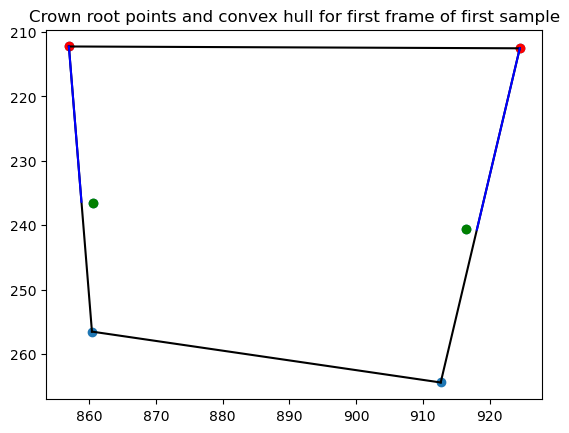

In [15]:
plt.figure()

# Plot the crown root points
plt.scatter(crown_pts[:, :, 0], crown_pts[:, :, 1])

# Plot the convex hull
for simplex in convhull.simplices:
    plt.plot(convhull.points[simplex, 0], convhull.points[simplex, 1], 'k-')

# Plot the crown root bases
plt.scatter(crown_bases[:, 0], crown_bases[:, 1], color='red')

# Plot the first nodes of the crown roots
plt.scatter(crown_r1_pts[:, 0], crown_r1_pts[:, 1], color='green')

# Plot the intersection vectors of the convex hull with the line across the first nodes of the crown roots
left_vector = chull_r1_intersection_vectors[0]
right_vector = chull_r1_intersection_vectors[1]
# Plot the left intersection vector from the first crown base
plt.plot([crown_bases[0, 0], crown_bases[0, 0] + left_vector[0, 0]], 
         [crown_bases[0, 1], crown_bases[0, 1] + left_vector[0, 1]], color='blue')

# Plot the right intersection vector from the second crown base
plt.plot([crown_bases[1, 0], crown_bases[1, 0] + right_vector[0, 0]], 
         [crown_bases[1, 1], crown_bases[1, 1] + right_vector[0, 1]], color='blue')


plt.title("Crown root points and convex hull for first frame of first sample")
plt.gca().invert_yaxis()

In [16]:
# Get the chull r1 intersection vectors for all frames
chull_r1_intersection_vectors_all_frames = []
for i in range(len(series)):
    print(f"Getting chull r1 intersection vectors for frame {i}")
    crown_pts = series.get_crown_points(i)
    convhull = get_convhull(crown_pts)
    crown_bases = get_bases(crown_pts)
    crown_r1_pts = get_nodes(crown_pts, 1)
    chull_r1_intersection_vectors = get_chull_intersection_vectors(crown_bases, crown_r1_pts, crown_pts, convhull)
    chull_r1_intersection_vectors_all_frames.append(chull_r1_intersection_vectors)

INFO:root:Unsupported geometry type: MultiLineString
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough un

Getting chull r1 intersection vectors for frame 0
Getting chull r1 intersection vectors for frame 1
Getting chull r1 intersection vectors for frame 2
Getting chull r1 intersection vectors for frame 3
Getting chull r1 intersection vectors for frame 4
Getting chull r1 intersection vectors for frame 5
Getting chull r1 intersection vectors for frame 6
Getting chull r1 intersection vectors for frame 7
Not enough instances or incorrect format to compute convex hull intersections.
Getting chull r1 intersection vectors for frame 8
Not enough instances or incorrect format to compute convex hull intersections.
Getting chull r1 intersection vectors for frame 9
Not enough instances or incorrect format to compute convex hull intersections.
Getting chull r1 intersection vectors for frame 10
Getting chull r1 intersection vectors for frame 11
Getting chull r1 intersection vectors for frame 12
Getting chull r1 intersection vectors for frame 13
Getting chull r1 intersection vectors for frame 14
Getting 

INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: no

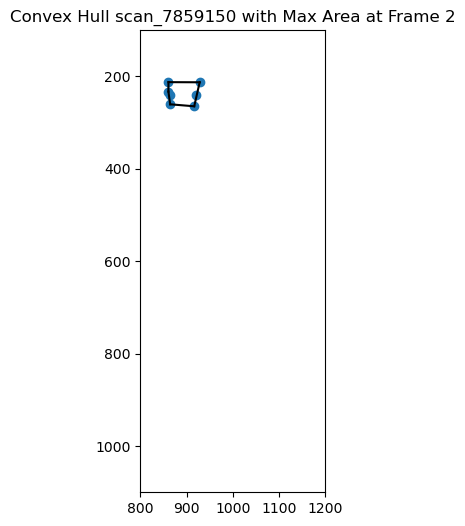

In [17]:
# Find the frame with the largest convex hull area and plot it

# Initialize lists to store the convex hull areas
hull, area = [], []

# Run convex hull features on all frames for crown roots
for i in range(len(series)):
    # Get crown root points
    crown_pts = series.get_crown_points(i)
    # Aggregate the crown points in one flattened array
    all_pts = get_all_pts_array(crown_pts)

    # Get the convex hull of the crown points
    convhull = get_convhull(crown_pts)
    # Get the area of the convex hull
    chull_area = get_chull_area(convhull)

    # Append the convex hull and convex hull area to the lists
    hull.append(convhull)
    area.append(chull_area)

    
# Frame with the max convex hull area
idx_max_area = np.nanargmax(area)

# Plot convex hull of frame with the max width
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(hull[idx_max_area].points[:,0], hull[idx_max_area].points[:,1], 'o')
for simplex in hull[idx_max_area].simplices:
    ax.plot(hull[idx_max_area].points[simplex, 0], hull[idx_max_area].points[simplex, 1], 'k-')

plt.title(f"Convex Hull {series.series_name} with Max Area at Frame {idx_max_area}")    
plt.xlim([800, 1200])
plt.ylim([1100, 100]) # Invert y-axis to match image coordinates
ax.set_aspect('equal')  # Set aspect ratio to 1
plt.show()



Use the `OlderMonocotPipeline` to calculate all traits

In [18]:
# Initialize the pipeline
pipeline = sr.OlderMonocotPipeline()

In [19]:
# Compute the traits for one plant
plant_traits_df = pipeline.compute_plant_traits(series, write_csv=True)

INFO:root:Unsupported geometry type: MultiLineString
INFO:root:Unsupported geometry type: MultiLineString
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points

Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Cannot compute convex hull: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1711494979  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 48  Error-roundoff 7.3e-13  _one-merge 3.7e-12
  _near-inside 1.8e-11  Visible-distance 1.5e-12  U-max-coplanar 1.5e-12
  Width-outside 2.9e-12  _wide-facet 8.8e-12  _maxoutside 4.4e-12

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v3): 9.2e+02 2.4e+02
- p2(v2): 9.3e+02 2.4e+02
- p0(v1): 8.8e+02 2.4e+02

The center point is coplanar with a facet, or a 

INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.


Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Cannot compute convex hull: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1711494979  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 52  Error-roundoff 7.2e-13  _one-merge 3.6e-12
  _near-inside 1.8e-11  Visible-distance 1.4e-12  U-max-coplanar 1.4e-12
  Width-outside 2.9e-12  _wide-facet 8.7e-12  _maxoutside 4.3e-12

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clear

In [20]:
# Display the plant traits
plant_traits_df

,plant_name,frame_idx,crown_count,crown_lengths_min,crown_lengths_max,crown_lengths_mean,crown_lengths_median,crown_lengths_std,crown_lengths_p5,crown_lengths_p25,...,chull_line_lengths_p25,chull_line_lengths_p75,chull_line_lengths_p95,ellipse_ratio,scanline_last_ind,scanline_first_ind,angle_chull_r1_left_intersection_vector,angle_chull_r1_right_intersection_vector,chull_area_above_r1_intersection,chull_area_below_r1_intersection
0,scan_7859150,0,2,44.544361,53.323028,48.933694,48.933694,4.389334,44.983294,46.739027,...,52.931705,74.122758,77.379604,2.336681,11.0,10.0,4.460297,12.859717,1661.743656,1235.340369
1,scan_7859150,1,2,28.229820,48.152413,38.191116,38.191116,9.961296,29.225949,33.210468,...,33.176705,65.535618,73.045530,2.488280,11.0,10.0,0.167924,8.820859,1614.146226,700.971016
2,scan_7859150,2,3,19.854894,53.350404,31.215416,20.440951,15.653629,19.913499,20.147922,...,49.133120,69.828285,78.218751,2.200433,12.0,10.0,0.289812,12.789384,1581.933287,1455.127629
3,scan_7859150,3,2,31.996798,33.828739,32.912769,32.912769,0.915970,32.088395,32.454784,...,38.405491,67.272467,68.885385,NaN,11.0,10.0,NaN,NaN,NaN,NaN
4,scan_7859150,4,2,28.051633,32.547984,30.299808,30.299808,2.248176,28.276450,29.175720,...,38.524618,68.309222,69.182745,NaN,11.0,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,scan_7859150,67,2,28.954201,32.498650,30.726426,30.726426,1.772224,29.131424,29.840314,...,37.306853,66.871202,67.301421,NaN,11.0,10.0,13.637725,26.377181,1768.388100,NaN
68,scan_7859150,68,1,32.624065,32.624065,32.624065,32.624065,0.000000,32.624065,32.624065,...,NaN,NaN,NaN,NaN,11.0,10.0,NaN,NaN,NaN,NaN
69,scan_7859150,69,2,25.528780,32.622696,29.075738,29.075738,3.546958,25.883476,27.302259,...,37.458519,65.860190,67.007578,NaN,11.0,10.0,13.554877,17.791483,1668.109241,NaN
70,scan_7859150,70,2,46.336886,48.237938,47.287412,47.287412,0.950526,46.431939,46.812149,...,49.128707,72.421237,76.673317,2.218046,11.0,10.0,4.409235,14.452406,1660.717896,1121.622718


In [21]:
# Compute the traits for all plants in the folder and get summary statistics per plant
csv_path = "my_summarized_traits.csv" # Modify this path to save the summarized traits
pipeline.compute_batch_traits(all_series, write_csv=True, csv_path=csv_path)

INFO:root:Unsupported geometry type: MultiLineString
INFO:root:Unsupported geometry type: MultiLineString
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.


Processing series: scan_7859150
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Cannot compute convex hull: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1711494979  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 48  Error-roundoff 7.3e-13  _one-merge 3.7e-12
  _near-inside 1.8e-11  Visible-distance 1.5e-12  U-max-coplanar 1.5e-12
  Width-outside 2.9e-12  _wide-facet 8.8e-12  _maxoutside 4.4e-12

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v3): 9.2e+02 2.4e+02
- p2(v2): 9.3e+02 2.4e+02
- p0(v1): 8.8e+02 2.4e+02

The center point

INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.


Not enough instances or incorrect format to compute convex hull intersections.
Cannot compute convex hull: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1711494979  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 48  Error-roundoff 7.6e-13  _one-merge 3.8e-12
  _near-inside 1.9e-11  Visible-distance 1.5e-12  U-max-coplanar 1.5e-12
  Width-outside 3e-12  _wide-facet 9.1e-12  _maxoutside 4.5e-12

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v3): 9.2e+02 2.4e+02
- p2(v2): 9.7e+02 2.4e+02
- p0(v1): 9.2e+02 2.4e+02

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 7.6e-13.  The center point, facets and distances
to the cen

INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: not enough unique points.
INFO:root:Cannot compute convex hull: no

Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute convex hull intersections.
Not enough instances or incorrect format to compute 

c:\miniforge3\envs\sleap_roots_dev\Lib\site-packages\shapely\creation.py:119: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)


Batch traits saved to my_summarized_traits.csv


,plant_name,crown_count_min,crown_count_max,crown_count_mean,crown_count_median,crown_count_std,crown_count_p5,crown_count_p25,crown_count_p75,crown_count_p95,...,chull_area_above_r1_intersection_p95,chull_area_below_r1_intersection_min,chull_area_below_r1_intersection_max,chull_area_below_r1_intersection_mean,chull_area_below_r1_intersection_median,chull_area_below_r1_intersection_std,chull_area_below_r1_intersection_p5,chull_area_below_r1_intersection_p25,chull_area_below_r1_intersection_p75,chull_area_below_r1_intersection_p95
0,scan_7859150,1,3,1.486111,1.0,0.526863,1.00,1.0,2.0,2.0,...,1719.280108,383.114692,1455.127629,818.604114,833.248892,312.109762,429.261591,511.771812,1044.901310,1243.558895
1,scan0K9E8BI,3,7,5.194444,5.0,1.100996,3.55,4.0,6.0,7.0,...,13012.237747,69390.314363,102194.593194,89089.328699,92592.570788,11469.652216,70135.671478,76842.601107,99083.251774,101022.329590
